In [1]:
#!/usr/bin/env python
# coding: utf-8

# Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Functipn to split data into training, validation and test sets
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import glob   # The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, although results are returned in arbitrary order. No tilde expansion is done, but *, ?, and character ranges expressed with [] will be correctly matched.
import os   # miscellneous operating system interfaces. This module provides a portable way of using operating system dependent functionality. If you just want to read or write a file see open(), if you want to manipulate paths, see the os.path module, and if you want to read all the lines in all the files on the command line see the fileinput module.
import random       
from tqdm import tqdm 
from tqdm.notebook import tqdm_notebook
import datetime
import time
from tabulate import tabulate
import math 

import umap
import math


# Torch
import torch
from torchvision import transforms
import torchvision.models as models
import torch.nn as nn


from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_curve,log_loss, accuracy_score, f1_score
from sklearn.metrics import average_precision_score,roc_auc_score
from sklearn.ensemble import VotingClassifier
import os
import time
from time import time
import datetime
import pandas as pd
import numpy as np
#from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from skmultilearn.adapt import MLkNN

# CMAP (extracting relevant transcriptomic profiles)
from cmapPy.pandasGEXpress.parse import parse
import cmapPy.pandasGEXpress.subset_gctoo as sg
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
import time
import joblib

from sklearn.decomposition import PCA,FactorAnalysis
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from sklearn.metrics import precision_recall_curve,log_loss
from sklearn.metrics import average_precision_score,roc_auc_score
from sklearn.feature_selection import VarianceThreshold
import os
import pandas as pd
import numpy as np
import torch
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
nn._estimator_type = "classifier"
import neptune.new as neptune


In [2]:
import sys
sys.path.append('/home/jovyan/Tomics-CP-Chem-MoA/05_Global_Tomics_CP_CStructure/')
from Erik_alll_helper_functions import pre_processing, create_splits, load_train_valid_data

RDKit WARNING: [15:12:44] Enabling RDKit 2019.09.1 jupyter extensions


In [3]:
# clue row metadata with rows representing transcription levels of specific genes
clue_gene = pd.read_csv('/home/jovyan/Tomics-CP-Chem-MoA/04_Tomics_Models/init_data_expl/clue_geneinfo_beta.txt', delimiter = "\t")


In [6]:
 # download csvs with all the data pre split
#cyc_adr_file = '/home/jovyan/Tomics-CP-Chem-MoA/data_for_models/5_fold_data_sets/cyc_adr/'
#train_filename = 'cyc_adr_clue_train_fold_0.csv'
#val_filename = 'cyc_adr_clue_val_fold_0.csv'
#test_filename = 'cyc_adr_clue_test_fold_0.csv'
#training_set, validation_set, test_set =  load_train_valid_data(cyc_adr_file, train_filename, val_filename, test_filename)
   
# download csvs with all the data pre split
erik10_file = '/home/jovyan/Tomics-CP-Chem-MoA/data_for_models/5_fold_data_sets/erik10/'
train_filename = 'erik10_clue_train_fold_0.csv'
val_filename = 'erik10_clue_val_fold_0.csv'
test_filename = 'erik10_clue_test_fold_0.csv'

training_set, validation_set, test_set =  load_train_valid_data(erik10_file, train_filename, val_filename, test_filename)



L1000_training, L1000_validation, L1000_test = create_splits(training_set, validation_set, test_set)

variance_thresh = 0
normalize_c = False
df_train_features, df_val_features, df_train_labels, df_val_labels, df_test_features, df_test_labels, dict_moa = pre_processing(L1000_training, L1000_validation, L1000_test, 
         clue_gene, 
         npy_exists = False,
         use_variance_threshold = variance_thresh, 
         normalize = normalize_c, 
         save_npy = True)


pre-processing data!
extracting training transcriptomes
extracting validation transcriptomes
extracting test transcriptomes


Investigating using PCA


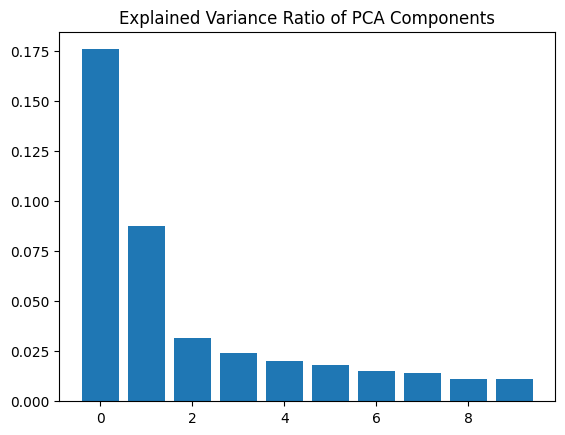

In [11]:
print("Investigating using PCA")
pca_ten = PCA(n_components=10)
pca_ten.fit_transform(df_train_features)
plt.figure()
plt.bar([i for i in range(0,10)], pca_ten.explained_variance_ratio_)
plt.title("Explained Variance Ratio of PCA Components")
plt.show() 

In [12]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_train_features)
principalDf = pd.DataFrame(data = principalComponents
             ,#  columns = [f' PC1: VarExp: {pca.explained_variance_[0]}', f' PC1: VarExp: {pca.explained_variance_[1]}'])
              columns = ["PC1" , "PC2"])
principalDf["moa"] =  df_train_labels
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel(f' Principal Component - 1: {pca.explained_variance_[0]}', fontsize=20)
plt.ylabel(f' Principal Component - 2: {pca.explained_variance_[1]}', fontsize=20)
plt.title("Principal Component Analysis of Dataset", fontsize=20)
targets = [i for i in dict_moa.keys()]

colors = [sns.color_palette()[x] for x in dict_moa.values()]
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['moa'] == target
    plt.scatter(principalDf.loc[indicesToKeep, "PC1"], 
                principalDf.loc[indicesToKeep, 'PC2'],  
                c= color,
                s = 10)

plt.legend(targets,prop={'size': 15})


pca = PCA(n_components=20)
principalComponents = pca.fit_transform(df_train_features)
principalDf = pd.DataFrame(data = principalComponents)

pca.explained_variance_ratio_
principalDf

principalDf["moa"] =  df_train_labels




ValueError: Expected a 1D array, got an array with shape (13460, 2)

In [ ]:
print("Starting UMAP")
# In[127]:
umap_neighbors = 15
umap_min_dist = 0.1
reducer = umap.UMAP(n_neighbors= umap_neighbors, min_dist = umap_min_dist)


# change moa to classes using the above dictionary
for i in range(principalDf.shape[0]):
    principalDf.iloc[i, -1] = dict_moa[principalDf.iloc[i, -1]]



embedding = reducer.fit_transform(principalDf)

targets = [i for i in dict_moa.keys()]
plt.figure()
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in principalDf.moa], 
    s = 5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24);
plt.legend(targets , prop={'size': 7})



# In[162]:


import umap.plot
plt.figure(figsize=(10,10))
umap.plot.points(reducer, labels= principalDf.moa, theme = "fire")
plt.title('UMAP projection of the dataset', fontsize=24)
umap.plot.plt.savefig("umap.png")

import matplotlib.image as mpimg
umap_img = mpimg.imread('umap.png')

run["images/umap_plot"] = neptune.types.File.as_image(umap_img)

run.stop()
